# IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [32]:
df['TV'].value_counts().keys()

Int64Index([125,  72,  12, 111, 146, 161, 114, 122, 156,  54,
            ...
             82,  69,  83,  45,  25,  90, 139, 124,  22, 154],
           dtype='int64', length=190)

In [36]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,95.140000,81.520000,82.975000,57.370000
std,57.879185,54.617633,49.412423,48.802076,32.465414
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,48.750000,37.750000,40.750000,30.750000
50%,100.500000,96.500000,80.500000,80.500000,54.000000
75%,150.250000,142.250000,125.250000,124.000000,84.000000
max,200.000000,189.000000,166.000000,171.000000,120.000000


# LABEL ENCODING

In [33]:
from sklearn.preprocessing import LabelEncoder

In [9]:
enc=LabelEncoder()

In [14]:
df.TV=enc.fit_transform(df.TV)
df.Radio=enc.fit_transform(df.Radio)
df.Newspaper=enc.fit_transform(df.Newspaper)
df.Sales=enc.fit_transform(df.Sales)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   TV          200 non-null    int64
 2   Radio       200 non-null    int64
 3   Newspaper   200 non-null    int64
 4   Sales       200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


# DATA VISUALIZATION

In [17]:
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt

Histogram

<AxesSubplot:>

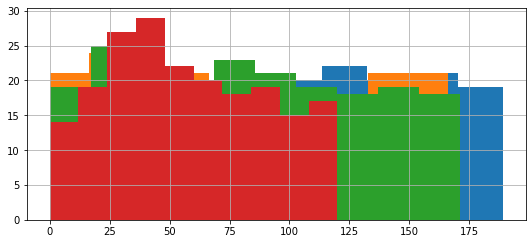

In [50]:
df['TV'].hist()
df['Radio'].hist()
df['Newspaper'].hist()
df['Sales'].hist()

ScatterPlot

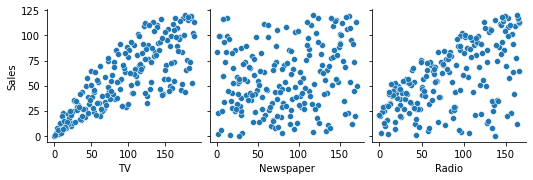

In [27]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

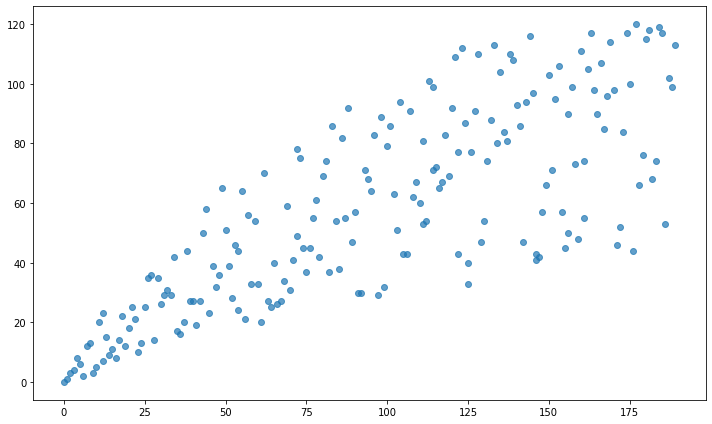

In [30]:
plt.figure(figsize=(10, 6))
# Feature 'TV'
plt.scatter(df['TV'], df['Sales'], label='TV', alpha=0.7)


BarPlot

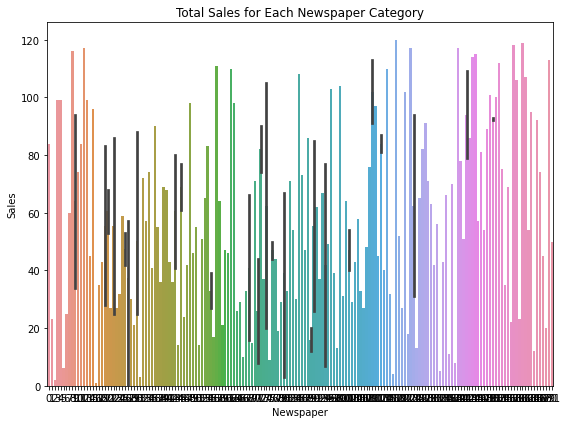

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Newspaper', y='Sales', data=df)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Total Sales for Each Newspaper Category')
plt.show()

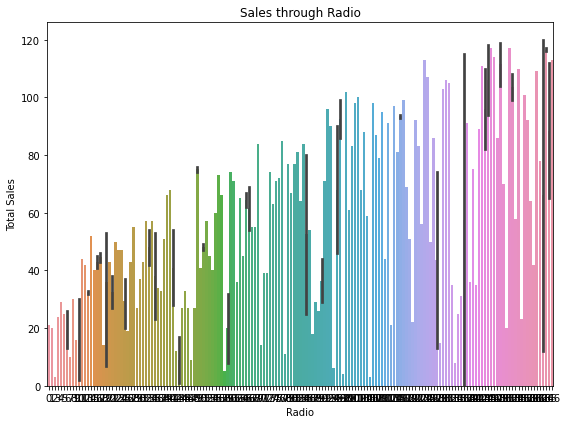

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x='Radio', y='Sales', data=df)
plt.xlabel('Radio')
plt.ylabel('Total Sales')
plt.title('Sales through Radio')
plt.show()

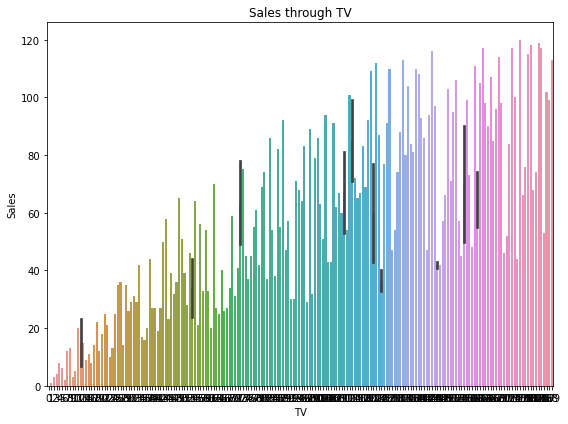

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x='TV', y='Sales', data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales through TV')
plt.show()

HeatMap

<AxesSubplot:>

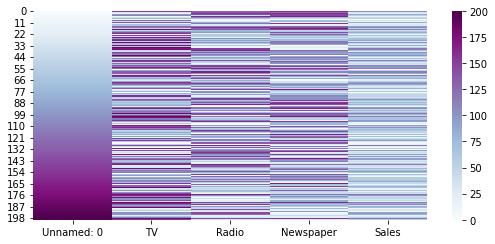

In [45]:
sns.heatmap(df, cmap="BuPu")

Model Fitting

In [61]:
x=df[['TV','Radio','Newspaper']]
y=df[['Sales']]

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model=LinearRegression()

In [75]:
model.fit(x_train,y_train)    

LinearRegression()

In [95]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [100]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 113.71581512443882
Mean Absolute Error: 8.259166199952068
Root Mean Squared Error: 10.663761771740722
R-squared (R2) Score: 0.9099029114073919


In [101]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

C:\Users\admin\AppData\Local\Temp\ipykernel_1896\2490048369.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,y_train)


RandomForestRegressor()

In [107]:
y_pred = model2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score=r2_score(y_test,y_pred)

In [108]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score:{r2}")

Mean Squared Error: 22.15044500000001
Mean Absolute Error: 3.8995000000000006
Root Mean Squared Error: 4.706425926326687
R-squared (R2) Score:0.9099029114073919
